Thiago Guimarães de Salles - 0050015244

In [0]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
import seaborn as sns
%matplotlib inline
from sklearn import metrics

In [0]:
dataset = load_boston()


In [34]:
d = pd.DataFrame(data.data, columns=data.feature_names)
d.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [35]:
d.shape

(506, 13)

12 features

target: LSTAT

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


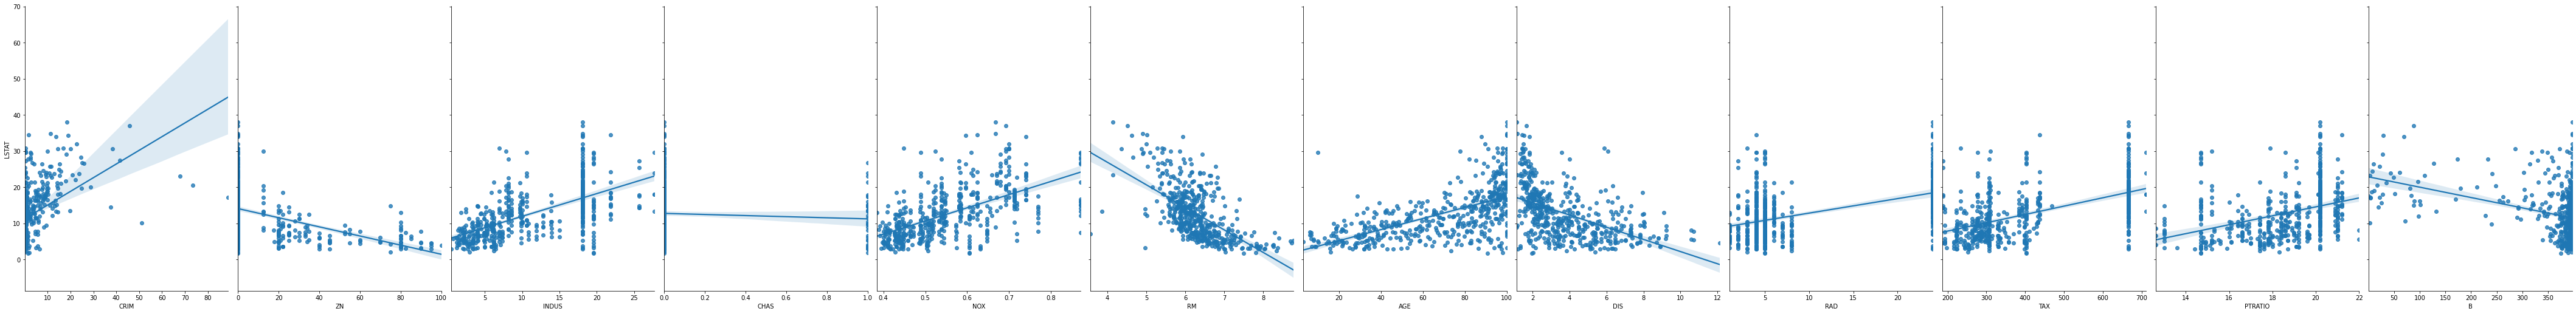

In [39]:
sns.pairplot(d, x_vars=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B'], y_vars='LSTAT', size=7, aspect=0.7, kind='reg')

In [41]:
feature_cols = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B']
X = d[feature_cols]
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90


In [43]:
y = d['LSTAT']
y = d.LSTAT
y.head()

0    4.98
1    9.14
2    4.03
3    2.94
4    5.33
Name: LSTAT, dtype: float64

X são as features da tabela e Y são os targets

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [45]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(379, 12)
(379,)
(127, 12)
(127,)


São 75% para treino e 25% par teste

In [46]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
print(linreg.intercept_)
print(linreg.coef_)

29.156614197380264
[ 9.65829285e-02  1.81395460e-02  1.03527380e-01 -5.34766107e-01
  5.11598668e+00 -4.39334194e+00  1.01960457e-01  2.48555105e-01
  5.09551884e-02 -1.83914607e-03  1.05152129e-01 -8.12034536e-03]


In [48]:
list(zip(feature_cols, linreg.coef_))

[('CRIM', 0.09658292851502573),
 ('ZN', 0.018139545951595778),
 ('INDUS', 0.10352738027381134),
 ('CHAS', -0.5347661073288893),
 ('NOX', 5.115986683861467),
 ('RM', -4.393341937463161),
 ('AGE', 0.10196045676932991),
 ('DIS', 0.2485551050560804),
 ('RAD', 0.05095518837871424),
 ('TAX', -0.0018391460674385147),
 ('PTRATIO', 0.1051521291902764),
 ('B', -0.008120345359154096)]

In [0]:
y_pred = linreg.predict(X_test)

In [57]:
y_pred

array([ 8.9295456 ,  8.98371554, 14.24337379,  8.42212897, 21.12935972,
       15.73506868,  6.30538573, 16.22818165, 15.27029156,  9.62441372,
       12.04363071,  5.57148861, 13.36455444, 10.44109244, 14.81186544,
       20.85923511, 15.74998697,  1.84875987,  9.20177356, 22.22609148,
       15.18843543, 21.37992719, 12.31211193,  8.11950814,  6.87439953,
       22.3943353 , 16.77120675, 10.74153326,  7.88375129, 21.13143477,
        8.31033466, 15.49430143,  0.68274878, 17.67499447,  7.79727586,
       10.46278407, 17.44919835,  5.85388241, 27.82775777, 15.65313833,
        5.22191598,  8.94584071, 10.87792949, 17.70676078, 17.42508497,
       15.83901768,  8.0596551 , 19.00032966, 16.91650901, 15.1393393 ,
       10.55664648, 10.09297473,  9.48151914, 15.7067325 , 21.65797164,
       11.5486847 , 17.50537685, 10.5412594 , 14.60669619,  2.87359297,
       17.80072755,  8.07750615, 19.48818617, 17.68294399,  9.71356437,
        6.35225509,  2.7872643 ,  8.6971722 , 10.25415668, 16.58

In [60]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

4.153372487830845


In [62]:
feature_cols = ['CRIM', 'ZN']
X = d[feature_cols]
y = d.LSTAT
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

5.65417451291212
